In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import contextily as cx
import networkx as nx
from shapely.geometry import Point
from sklearn.metrics.pairwise import euclidean_distances

In [2]:
ssf_tracts = [
    '6001P',
    '6017',
    '6018P',
    '6018',
    '6019',
    '6019.01',
    '6019.02',
    '6020P',
    '6020.01',
    '6020.02',
    '6021',
    '6022',
    '6022.02',
    '6022.01',
    '6023P',
    '6024P',
    '6024',
    '6025',
    '6026',
    '6026.02',
    '6038.01',
    '6038.02',
    '6039',
    '6040',
    '6041.02P',
    '6041.03',
    '6041.04',
    '6042P'
]
sb_tracts = [
    '6023P',
    '6030P',
    '6035P',
    '6036P',
    '6037',
    '6038P',
    '6039P',
    '6040',
    '6041.01P',
    '6041.02P',
    '6042P',
    '6046P',
    '6135.01P'
]

other_tracts = [
    '6016.01',
    '6027',
    '6140',
    '6016.03',
    '6016.05'
]

tracts = ssf_tracts + sb_tracts + other_tracts

# Tracts in the shapefile don't contain 'P'
reformat = lambda tract: tract.replace('P', '')
tracts_reformatted = list(map(reformat, tracts))

In [3]:
census_tracts = gpd.read_file('../shapefiles/tl_2024_06_tract.shp')
census_tracts['NAME'] = census_tracts['NAME'].astype(str)

In [4]:
ssf_sb_tracts = census_tracts[(census_tracts['COUNTYFP'] == '081') & census_tracts['NAME'].isin(tracts_reformatted)]

In [5]:
daily_asds = gpd.read_file('../data/Daily ASDS 2018-2023 for South San Francisco San Bruno.csv')
hourly_asds = gpd.read_file('../data/Hourly ASDS 2018-2023 for South San Francisco San Bruno.csv')

In [6]:
metadata = gpd.read_file('../data/ASDS 2018-2023 for South San Francisco and San Bruno Metadata.csv', GEOM_POSSIBLE_NAMES="geometry", KEEP_GEOM_COLUMNS="NO")

<Axes: >

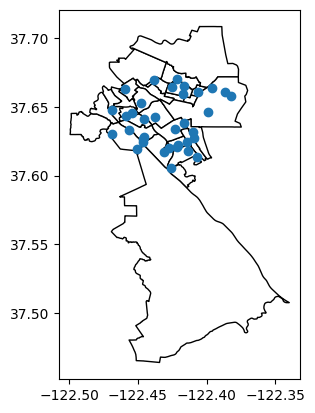

In [7]:
base = ssf_sb_tracts.plot(edgecolor='black', color='white')
metadata.plot(ax=base)

In [8]:
ssf_sb_tracts

,STATEFP,COUNTYFP,TRACTCE,GEOID,GEOIDFQ,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
1247,06,081,602100,06081602100,1400000US06081602100,6021,Census Tract 6021,G5020,S,480239,0,+37.6618014,-122.4064186,"POLYGON ((-122.41140 37.65877, -122.41120 37.6..."
1251,06,081,602400,06081602400,1400000US06081602400,6024,Census Tract 6024,G5020,S,2721940,0,+37.6444886,-122.4357422,"POLYGON ((-122.44941 37.64520, -122.44934 37.6..."
1252,06,081,602500,06081602500,1400000US06081602500,6025,Census Tract 6025,G5020,S,1190859,0,+37.6399723,-122.4505916,"POLYGON ((-122.46350 37.64150, -122.46341 37.6..."
1359,06,081,603700,06081603700,1400000US06081603700,6037,Census Tract 6037,G5020,S,1855798,0,+37.6326394,-122.4484921,"POLYGON ((-122.46406 37.63882, -122.46399 37.6..."
1475,06,081,604000,06081604000,1400000US06081604000,6040,Census Tract 6040,G5020,S,915011,0,+37.6234200,-122.4206865,"POLYGON ((-122.42848 37.62448, -122.42846 37.6..."
1476,06,081,604102,06081604102,1400000US06081604102,6041.02,Census Tract 6041.02,G5020,S,2320771,0,+37.6332687,-122.4257253,"POLYGON ((-122.43986 37.63669, -122.43965 37.6..."
2287,06,081,601901,06081601901,1400000US06081601901,6019.01,Census Tract 6019.01,G5020,S,888161,0,+37.6659681,-122.4343717,"POLYGON ((-122.44432 37.66568, -122.44339 37.6..."
2288,06,081,603802,06081603802,1400000US06081603802,6038.02,Census Tract 6038.02,G5020,S,2601740,0,+37.6190778,-122.4345807,"POLYGON ((-122.44710 37.62439, -122.44667 37.6..."
2332,06,081,614000,06081614000,1400000US06081614000,6140,Census Tract 6140,G5020,S,3165618,0,+37.6276315,-122.4598112,"POLYGON ((-122.47272 37.63380, -122.47253 37.6..."
2334,06,081,603801,06081603801,1400000US06081603801,6038.01,Census Tract 6038.01,G5020,S,227422,0,+37.6200410,-122.4282283,"POLYGON ((-122.43161 37.61903, -122.43140 37.6..."


In [9]:
health_ins_coverage = gpd.read_file('../data/ACSST5Y2023.S2701-Data.csv')[1:]

In [10]:
health_ins_coverage

,GEO_ID,NAME,S2701_C01_001E,S2701_C01_001M,S2701_C01_002E,S2701_C01_002M,S2701_C01_003E,S2701_C01_003M,S2701_C01_004E,S2701_C01_004M,...,S2701_C05_058E,S2701_C05_058M,S2701_C05_059E,S2701_C05_059M,S2701_C05_060E,S2701_C05_060M,S2701_C05_061E,S2701_C05_061M,field_613,geometry
1,1400000US06081600100,Census Tract 6001; San Mateo County; California,5070,197,402,147,660,220,347,158,...,4.1,8.1,8.2,7.2,0.0,1.2,0.0,11.2,,None
2,1400000US06081601601,Census Tract 6016.01; San Mateo County; Califo...,2720,356,145,75,492,157,177,49,...,9.1,8.8,9.3,6.1,2.4,1.8,14.9,14.2,,None
3,1400000US06081601603,Census Tract 6016.03; San Mateo County; Califo...,6485,672,515,212,752,241,396,127,...,5.8,5.5,6.9,5.8,2.0,1.5,5.9,6.5,,None
4,1400000US06081601605,Census Tract 6016.05; San Mateo County; Califo...,6008,585,207,74,599,101,395,110,...,3.3,5.7,1.1,1.8,4.1,2.4,3.9,6.5,,None
5,1400000US06081601700,Census Tract 6017; San Mateo County; California,4506,522,322,112,613,262,225,81,...,0.0,12.4,0.0,6.3,0.4,0.6,0.0,14.2,,None
6,1400000US06081601800,Census Tract 6018; San Mateo County; California,5967,753,389,162,643,194,540,344,...,0.0,15.4,6.2,10.8,1.0,1.3,0.0,15.4,,None
7,1400000US06081601901,Census Tract 6019.01; San Mateo County; Califo...,3988,576,181,84,819,266,276,137,...,18.0,13.1,2.6,3.1,1.8,2.1,22.6,14.4,,None
8,1400000US06081601902,Census Tract 6019.02; San Mateo County; Califo...,5467,704,204,152,745,289,324,223,...,14.1,22.7,9.7,14.4,4.4,3.4,0.0,28.7,,None
9,1400000US06081602001,Census Tract 6020.01; San Mateo County; Califo...,3825,436,171,137,323,132,304,139,...,0.0,19.7,0.0,6.3,1.0,1.4,0.0,24.4,,None
10,1400000US06081602002,Census Tract 6020.02; San Mateo County; Califo...,3928,790,193,141,537,115,279,91,...,0.0,18.3,10.2,9.6,2.0,1.8,0.0,27.8,,None


In [11]:
ex_tract = lambda name: name.split('Census Tract')[-1].split(';')[0].strip()
health_ins_coverage['NAME'] = health_ins_coverage['NAME'].apply(ex_tract).astype(str)
health_ins_coverage['S2701_C05_001E'] = health_ins_coverage['S2701_C05_001E'].astype(float)

In [12]:
ins_mapping = ssf_sb_tracts.join(health_ins_coverage.set_index('NAME')[['S2701_C05_001E']], on='NAME')

<Axes: >

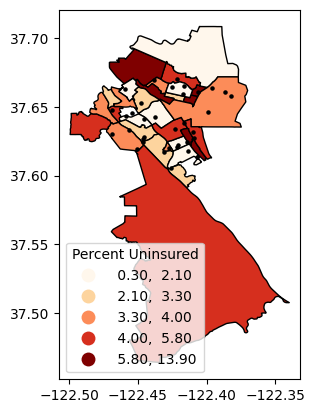

In [13]:
base = ins_mapping.plot(
    column='S2701_C05_001E', 
    edgecolor='black',
    cmap='OrRd',
    legend=True,
    missing_kwds={
        'color': 'lightgrey',
        'edgecolor': 'red',
        'hatch': '///',
        'label': 'No data'
    },
    legend_kwds={'title': 'Percent Uninsured'},
    scheme='quantiles'
)
metadata.plot(ax=base, color='black', markersize=5)

In [14]:
# Manually handling float error because pandas is a fucking dumbass
def manual_tofloat(val):
    try:
        return float(val)
    except Exception:
        return float('NaN')

In [15]:
hourly_asds['PM2.5_EPA'] = hourly_asds['PM2.5_EPA'].apply(manual_tofloat)

In [16]:
hourly_asds_pivot = hourly_asds.pivot(index='Datetime', columns='Site_ID', values='PM2.5_EPA')

In [234]:
sensor_corrs = hourly_asds_pivot.corr()

In [235]:
sensor_corrs['104538']['107708']

0.9653000127134312

In [246]:
hourly_asds['Datetime'].min()

'2018-12-27 04:00:00'

In [236]:
sensor_corrs

Site_ID,104538,107708,109506,109718,111235,111498,113144,119179,120937,131431,...,69403,70569,70679,76803,78387,81205,86761,90215,91617,94137
Site_ID,,,,,,,,,,,,,,,,,,,,,
104538,1.000000,0.965300,0.949859,0.952895,0.948179,0.879473,NaN,0.884176,0.946282,0.882656,...,0.934577,0.875873,0.894729,0.746937,0.934310,0.832834,NaN,0.948296,0.923272,0.900417
107708,0.965300,1.000000,0.953278,0.940831,0.898284,0.856117,NaN,0.886685,0.945551,0.887533,...,0.946088,0.853267,0.907472,0.724271,0.944846,0.833511,NaN,0.930804,0.900380,0.912520
109506,0.949859,0.953278,1.000000,0.980354,0.868579,0.888690,0.921773,0.947698,0.962730,0.906805,...,0.977823,0.923552,0.933005,0.735790,0.968566,0.868312,0.951687,0.959906,0.918502,0.966151
109718,0.952895,0.940831,0.980354,1.000000,0.863574,0.897836,0.921846,0.949715,0.961525,0.906172,...,0.973787,0.943831,0.929599,0.750762,0.961144,0.861245,0.958633,0.962528,0.914842,0.960708
111235,0.948179,0.898284,0.868579,0.863574,1.000000,0.886560,NaN,0.867237,0.951085,0.840684,...,0.874926,0.584644,0.879765,0.757584,0.885094,0.760319,NaN,0.895619,0.932193,0.954893
111498,0.879473,0.856117,0.888690,0.897836,0.886560,1.000000,0.964273,0.911822,0.892777,0.898540,...,0.882879,0.935850,0.855637,0.818703,0.894123,0.789618,0.925370,0.953446,0.951768,0.948898
113144,NaN,NaN,0.921773,0.921846,NaN,0.964273,1.000000,0.937216,0.912900,NaN,...,0.912148,0.946306,0.896258,NaN,0.920229,NaN,0.896162,0.948744,0.954818,0.934456
119179,0.884176,0.886685,0.947698,0.949715,0.867237,0.911822,0.937216,1.000000,0.947293,0.938293,...,0.931338,0.954098,0.925951,0.723562,0.963182,0.894831,0.935985,0.974023,0.919514,0.955572
120937,0.946282,0.945551,0.962730,0.961525,0.951085,0.892777,0.912900,0.947293,1.000000,0.907986,...,0.963373,0.938864,0.919311,0.757091,0.958618,0.862915,0.950823,0.947049,0.919198,0.954642


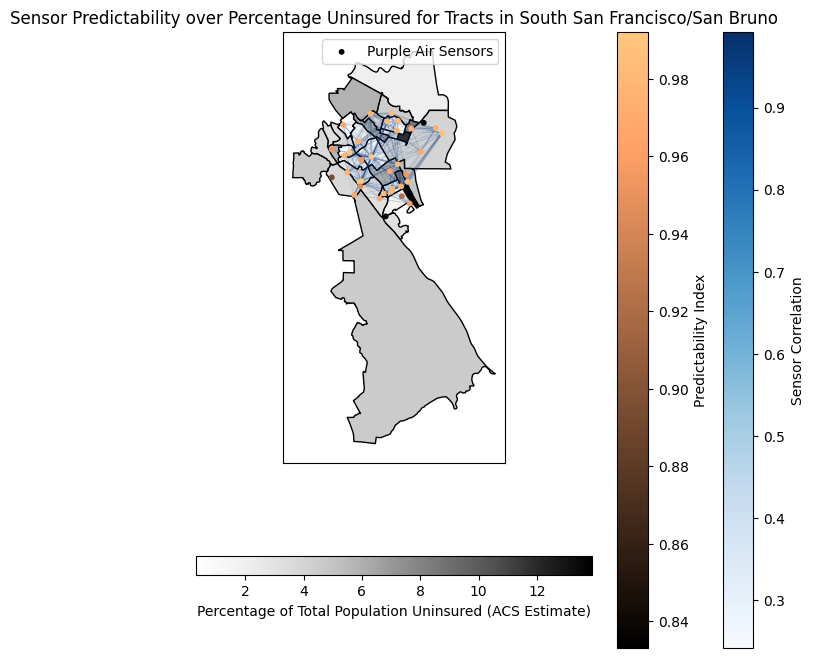

In [247]:
import matplotlib.colors as mcolors

base = ins_mapping
coords = np.array([list(point.coords)[0] for point in metadata.geometry])

corr_threshold = 0

G = nx.Graph()

# Add nodes (points)
for i, point in enumerate(metadata.geometry):
    G.add_node(i, pos=(point.x, point.y))

predictability = []
# Add edges (correlations based on distance)
for i in range(len(metadata)):
    sensor_i = metadata['Site_ID'][i]
    sensor_i_corrs = sensor_corrs[sensor_i]
    
    for j in range(i + 1, len(metadata)):
        sensor_j = metadata['Site_ID'][j]
        corr = sensor_i_corrs[sensor_j]            
        
        if corr == corr and abs(corr) > corr_threshold:
            G.add_edge(i, j, weight=corr)
        
    predictability.append(sensor_i_corrs[sensor_i_corrs.index != sensor_i].max())
    
# Step 4: Set the position for each node based on its geographical coordinates
pos = {i: (metadata.geometry[i].x, metadata.geometry[i].y) for i in range(len(metadata))}

# Step 5: Plot the map with GeoPandas and add the network

fig, ax = plt.subplots(figsize=(8, 8))

# Plot base map (you can use any geopandas dataframe that represents geographical boundaries)
base.plot(
    column='S2701_C05_001E', 
    edgecolor='black',
    cmap='Greys',
    legend=False,
    missing_kwds={
        'color': 'lightgrey',
        'edgecolor': 'red',
        'hatch': '///',
        'label': 'No data'
    },
    ax=ax
)

# Plot the points (nodes of the network)
#points.plot(ax=ax, color='red', markersize=50, label='Sensors')

edges, weights = zip(*nx.get_edge_attributes(G,'weight').items())
edge_width = list(map(lambda w: 4*w**50, weights))
edge_cmap = plt.cm.Blues
node_cmap = plt.cm.copper
tract_cmap = plt.cm.Greys

edges_sm = plt.cm.ScalarMappable(cmap=edge_cmap, norm=mcolors.Normalize(vmin=min(weights), vmax=max(weights)))
edges_sm.set_array([])
fig.colorbar(edges_sm, ax=ax, orientation="vertical", label="Sensor Correlation")

nodes_sm = plt.cm.ScalarMappable(cmap=node_cmap, norm=mcolors.Normalize(vmin=min(predictability), vmax=max(predictability)))
nodes_sm.set_array([])
fig.colorbar(nodes_sm, ax=ax, orientation="vertical", label="Predictability Index")

tract_sm = plt.cm.ScalarMappable(cmap=tract_cmap, norm=mcolors.Normalize(vmin=ins_mapping['S2701_C05_001E'].min(), vmax=ins_mapping['S2701_C05_001E'].max()))
tract_sm.set_array([])
fig.colorbar(tract_sm, ax=ax, orientation="horizontal", label="Percentage of Total Population Uninsured (ACS Estimate)")

# Plot the edges (connections between points)
nx.draw_networkx_edges(G, pos, ax=ax, edge_color=weights, width=edge_width, alpha=0.3, edge_cmap=plt.cm.Blues)

# Plot the nodes (points) on top of the map
nx.draw_networkx_nodes(G, pos, ax=ax, node_color=predictability, node_size=10, label='Purple Air Sensors', cmap=plt.cm.copper)

# Customize plot
ax.set_title('Sensor Predictability over Percentage Uninsured for Tracts in South San Francisco/San Bruno')
#plt.xlabel('Longitude')
#plt.ylabel('Latitude')
plt.legend()

plt.show()

<Axes: xlabel='Hour'>

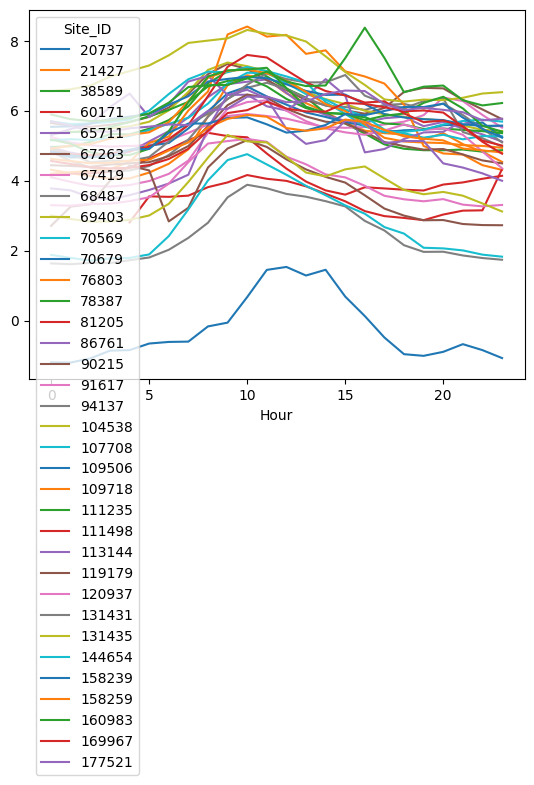

In [6]:
site = hourly_asds[['Site_ID', 'Hour', 'PM2.5_EPA']]
site_pivot = site.groupby(['Hour', 'Site_ID']).mean().reset_index().pivot(index='Hour', columns='Site_ID', values='PM2.5_EPA')
site_pivot.plot()

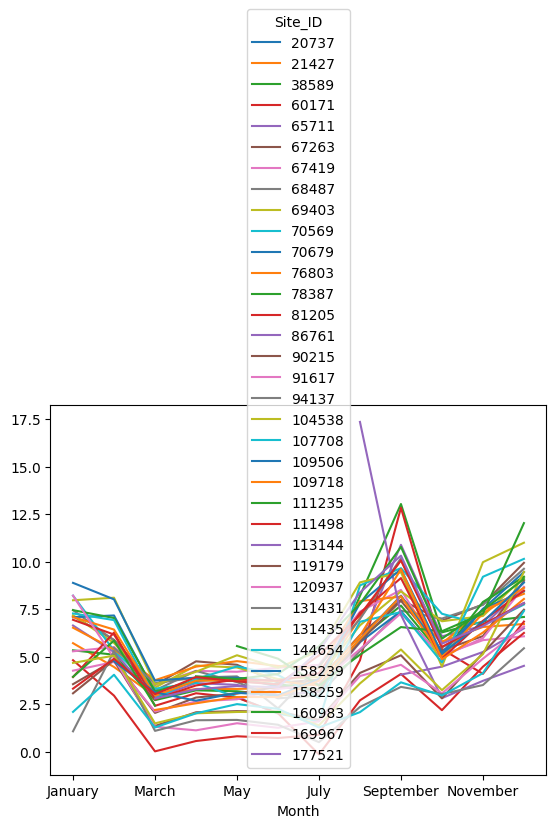

In [42]:
months = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]

mappers = {}
mappers['Month'] = { i + 1 : month for i, month in enumerate(months) }

def get_timeseries(time_period, sites_data, mapper=None):
    if mapper is None:
        if time_period in mappers:
            mapper = mappers[time_period]
        else:
            mapper = lambda x: x
    
    sites = sites_data[['Site_ID', time_period, 'PM2.5_EPA']]
    sites_tseries = sites.groupby([time_period, 'Site_ID']).mean().reset_index()
    sites_tseries = sites_tseries.pivot(index=time_period, columns='Site_ID', values='PM2.5_EPA')
    sites_tseries = sites_tseries.rename(index=mappers['Month'])
    sites_tseries.set_index(sites_tseries.index.map(mapper))
    
    return sites_tseries

sites_pivot = get_timeseries('Month', daily_asds)
sites_pivot.plot()

sites_pivot = sites_pivot.rename(index=mappers['Month'])

<Axes: xlabel='Month', ylabel='Site_ID'>

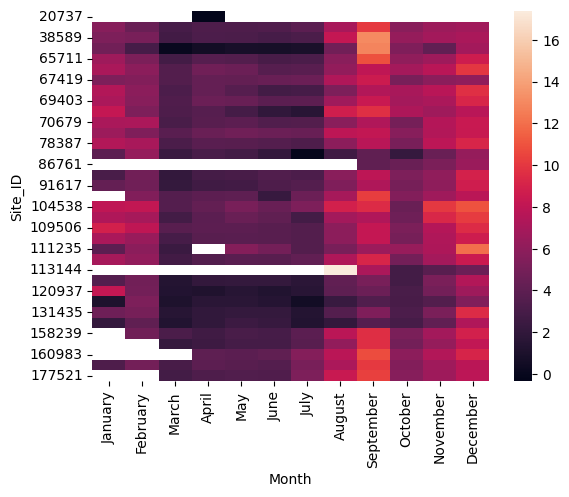

In [8]:
sns.heatmap(sites_pivot.T)

In [39]:
metadata[metadata["Site_ID"] == 65711][["Latitude", "Longitude"]]

,Latitude,Longitude
4,37.63386,-122.42311


In [9]:
sites_pivot

Site_ID,20737,21427,38589,60171,65711,67263,67419,68487,69403,70569,...,119179,120937,131431,131435,144654,158239,158259,160983,169967,177521
Month,,,,,,,,,,,,,,,,,,,,,
January,NaN,5.711316,5.334476,4.812810,6.641441,7.129609,5.282669,7.453500,7.182397,8.213751,...,3.550463,8.214268,1.067822,4.670933,2.091033,NaN,NaN,NaN,3.315821,NaN
February,NaN,4.456921,5.104348,2.947833,5.241844,5.888003,5.508032,5.852994,5.721712,5.320679,...,4.803701,4.916020,5.295085,5.056014,4.047011,4.756105,NaN,NaN,4.889294,NaN
March,NaN,2.924227,2.709327,0.013180,2.834476,3.502822,3.520875,3.226829,3.370402,3.308630,...,1.348058,1.308921,1.091597,1.486885,1.270142,3.123818,2.192610,NaN,3.027546,2.797694
April,-0.333099,3.298449,3.227083,0.556560,3.608473,4.754339,4.251061,4.248506,4.532298,3.620379,...,2.070997,1.120649,1.650599,2.016738,2.016885,2.682328,2.543561,3.966953,3.924414,3.276338
May,NaN,3.300791,3.177764,0.807037,3.514535,4.572531,4.204940,3.661673,4.428964,2.863513,...,2.132481,1.493166,1.668407,2.086539,2.500734,3.094424,2.876099,3.822915,3.697779,3.454083
June,NaN,3.356518,2.953571,0.716787,2.991550,3.632054,4.418957,2.807412,3.818514,2.003269,...,2.102931,1.253682,1.414762,2.109159,2.253684,2.959679,2.874253,4.088827,3.540555,3.390571
July,NaN,3.821165,3.154494,0.885877,3.141907,3.783059,4.569154,2.960767,3.928110,1.597474,...,1.674979,1.596626,0.496839,1.386837,1.270386,3.815884,3.730665,5.544656,5.070771,5.303137
August,NaN,7.038681,8.199405,4.805975,5.755860,6.136987,7.372365,5.304311,6.649715,8.755583,...,4.143848,3.980399,2.351229,3.589937,2.077802,7.821989,6.097439,7.778081,7.191132,8.378393
September,NaN,10.081242,13.040295,12.842580,10.891334,7.995785,8.515957,7.422147,8.440296,9.662147,...,5.071679,4.571580,3.408086,5.377011,3.648027,9.605868,9.605657,10.782718,10.075010,10.321902


<Axes: xlabel='Datetime', ylabel='Site_ID'>

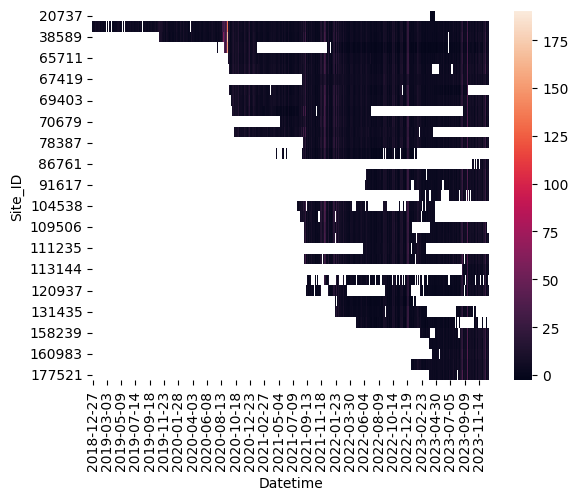

In [34]:
hourly_pm2 = get_timeseries('Datetime', daily_asds)
sns.heatmap(hourly_pm2.T)

c:\users\isaac\.pyenv\pyenv-win\versions\3.8.10\lib\site-packages\matplotlib\collections.py:963: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


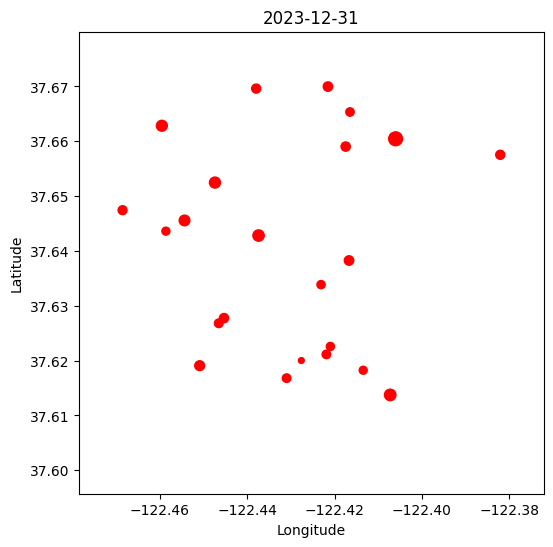

In [33]:
from matplotlib import animation

site_locations = metadata[["Site_ID", "Latitude", "Longitude"]].set_index('Site_ID')

hourly_pm2 = get_timeseries('Datetime', daily_asds)

fig, ax = plt.subplots(figsize=(6,6))

pad = 0.01
min_long = site_locations["Longitude"].min() - pad
max_long = site_locations["Longitude"].max() + pad
min_lat = site_locations["Latitude"].min() - pad
max_lat = site_locations["Latitude"].max() + pad

max_pm2 = hourly_pm2.max().max()
min_pm2 = hourly_pm2.min().min()

def init():
    ax.set_xlabel("Longitude")
    ax.set_ylabel("Latitude")
    
def animate(t):
    ax.cla()
    
    ax.set_xlim(min_long, max_long)
    ax.set_ylim(min_lat, max_lat)
    
    ax.set_title(f"{hourly_pm2.index[t]}")
    
    ax.scatter(
        x=site_locations["Longitude"], 
        y=site_locations["Latitude"], 
        s=10*hourly_pm2.iloc[t], 
        color="Red"
    )


animate(400)
anim = animation.FuncAnimation(
    fig, 
    animate, 
    frames=len(hourly_pm2.index), 
    interval=30, 
    repeat=False, 
    init_func=init, 
    cache_frame_data=False
)

anim.save('Movie.mp4')

In [68]:
hourly_pm2

Site_ID,20737,21427,38589,60171,65711,67263,67419,68487,69403,70569,...,119179,120937,131431,131435,144654,158239,158259,160983,169967,177521
Datetime,,,,,,,,,,,,,,,,,,,,,
2018-12-27,NaN,2.999879,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-12-28,NaN,3.857956,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-12-29,NaN,4.176301,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-12-30,NaN,5.093023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-12-31,NaN,3.513953,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-27,NaN,1.724641,1.679479,0.666909,3.073237,4.955116,3.424075,NaN,1.899201,0.566107,...,NaN,1.851974,NaN,NaN,NaN,3.161465,2.996255,2.978653,3.160157,1.800375
2023-12-28,NaN,4.595175,2.533695,3.691303,5.619716,5.577825,3.872925,NaN,5.084359,5.485125,...,NaN,3.976802,NaN,NaN,NaN,4.907223,5.505150,5.826531,6.881348,6.242467
2023-12-29,NaN,2.331104,1.204779,0.216131,2.952297,3.827075,3.243938,NaN,3.068454,0.731056,...,NaN,2.075286,NaN,NaN,-2.398517,3.053066,3.020257,3.129618,3.727226,2.210761
